### I. Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import warnings

### II. Merging 12 months of sales data into a single CSV file

In [2]:
files = [file for file in os.listdir("./Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Drop rows of NaN
all_data["Order ID"].replace("", np.nan, inplace = True)
all_data.dropna(subset=["Order ID"], inplace = True)

In [5]:
# Find "Or" and delete it
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [6]:
# Convert columns to the correct type
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

### III. Augment data with additional columns

#### III.1. Add Month columns

In [7]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


#### III.2.  Add Sales column

In [8]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


#### III.3. Add City columns

In [9]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


### Q1: What was the best month for sales and How much was earned that month?

In [10]:
results = all_data.groupby("Month").sum()[["Sales"]]
results

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


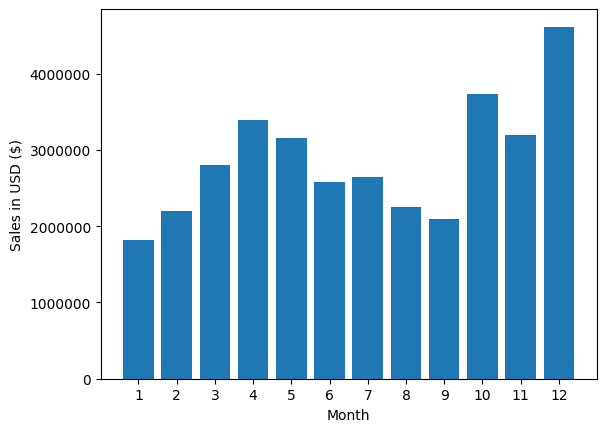

In [11]:
#* Reference: https://stackoverflow.com/questions/28371674/prevent-scientific-notation

months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Month")
plt.ylabel("Sales in USD ($)")
plt.show()

### Question 2: What city had the highest number of sales?

In [12]:
results = all_data.groupby("City").sum()[["Sales"]]
results

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


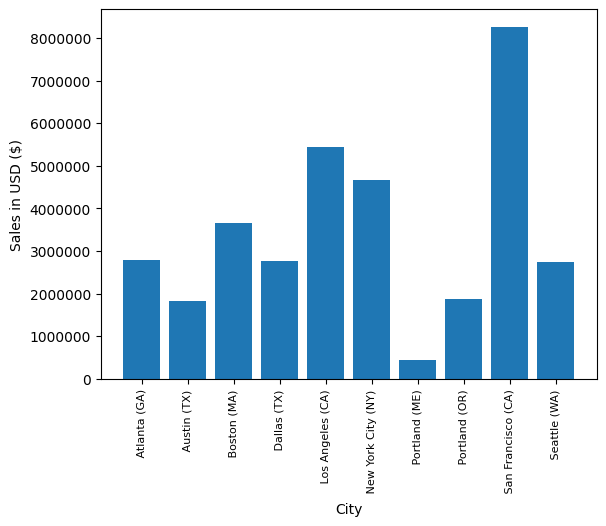

In [13]:
cities = [city for city, df in all_data.groupby("City")]

plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation = "vertical", size = 8)
plt.xlabel("City")
plt.ylabel("Sales in USD ($)")
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

   In the year 2019, San Francisco (CA) was the city with the highest sales revenue, generating a profit of $8,262,203.91, accounting for 24 % of the total sales revenue of all cities. This can be explained by the fact that San Francisco is the birthplace of Silicon Valley, one of the world's most significant centers of innovation and technology. The concentration of technology companies, startups, and experts can lead to a higher demand for electronic devices and utilities. Additionally, the tech-savvy culture in San Francisco often results in the early adoption of new electronic products and technologies. Residents may have a tendency to try out the latest gadgets and devices.

### Question 3: What time should we display advertisemenys  to maximize likelihood of customer's buying product?

In [47]:
# Convert datetime format 
# all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format="%Y-%m-%d %H:%M:%S")
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [48]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38


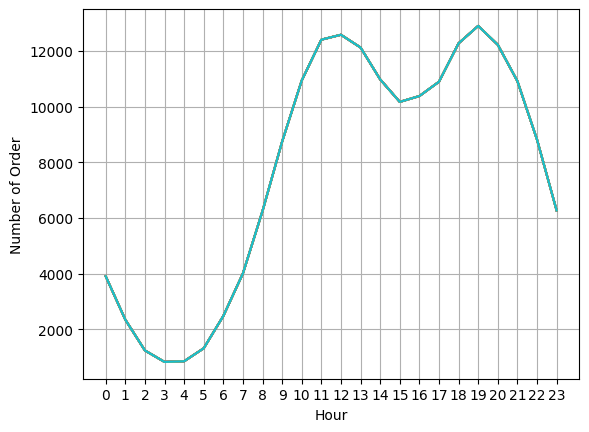

In [49]:
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Order")
plt.grid()
plt.show()

Customers tend to make purchases at two specific times of the day. The first period is from 11:00 AM to 12:00 PM, and the second period is between 6:00 PM to 7:00 PM in the evening. These time frames mostly coincide with breaks and meal times during work, making it convenient for customers to shop for electronic devices without hindrance. Therefore, these two time slots are the best times for advertising to reach customers. Advertising should be delivered through smart mobile devices or personal computers during the first time frame (11:00 AM to 12:00 PM noon) as customers tend to take breaks at their workplace. During the second time frame (6:00 PM to 7:00 PM), advertising should be transmitted through TV and other broadcasting devices since this is the time when work is over, and customers tend to relax at home.

### Question 4: What products are most often sold together

In [16]:
#* Referenced: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

# Identify duplicates Order ID
df = all_data[all_data["Order ID"].duplicated(keep=False)]

# Grouping all duplicated Order ID
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [17]:
#* Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Phones - charging cables and phones - earphones are two common pairs of products among the top 10 pairs of products most frequently purchased together. Among these, the number of customers buying an iPhone and a Lightning charging cable constitutes the largest quantity with 1005 orders sold. There is not much difference in the number of orders between those who purchase a Google Phone and a USB-C charging cable, with 987 orders. As for the phone - earphones pair, there is also not much discrepancy between the phones of the two brands, Google and iPhone, with 447 orders for iPhone Earphones with wires (This number for Google phone and wired earphones is 414 orders). The question that arises is whether there is a significant difference in the number of orders for the phone - charging cable and phone - earphones pairs.

### Question 5: What product sold the most? Why do you think it sold the most?

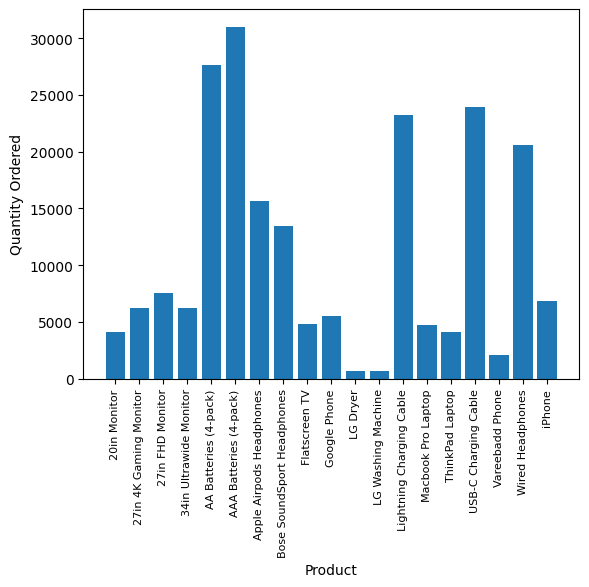

In [30]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products, rotation = "vertical", size = 8)
plt.show()

Batteries, charging cables, and headphones, in decreasing order, are the top three products with the highest sales volume, with AAA batteries being the best-selling product (over 30,000 units). The common feature among these items is that they are moderately priced and can be used for various purposes and different devices (batteries can power multiple devices; headphones and charging cables can be used with various devices). This leads to a relatively large disparity in the number of customers purchasing phone accessories like charging cables and headphones compared to the number of customers who only buy individual items such as charging cables, phones, and batteries.

The results also show that for relatively high-priced products such as phones, monitors, and washing machines, the number of units sold is not as high as for lower-priced products. Is there a correlation between pricing and the number of units sold?

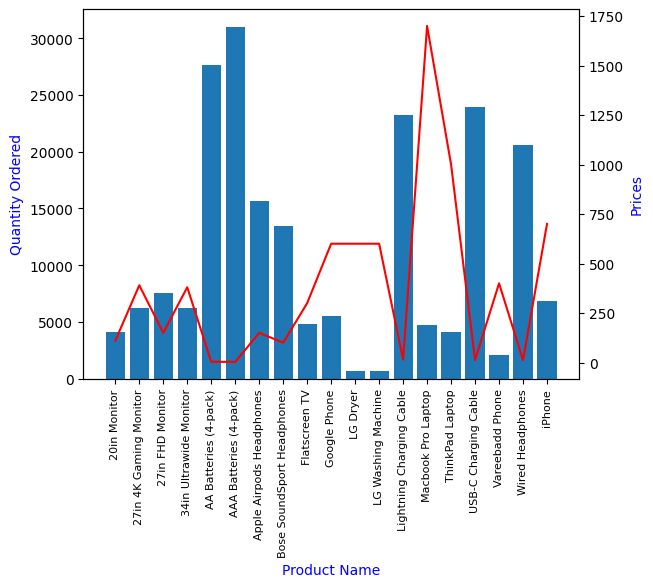

In [46]:
#* Referenced: https://stackoverflow.com/questions/44522741/pandas-mean-typeerror-could-not-convert-to-numeric
#* Referenced: https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
prices = all_data.groupby("Product").mean(numeric_only=True)["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, "r-")

ax1.set_xlabel("Product Name", color= "b")
ax1.set_ylabel("Quantity Ordered", color= "b")
ax2.set_ylabel("Prices", color= "b")
ax1.set_xticklabels(products, rotation = "vertical", size = 8)

warnings.filterwarnings("ignore")
plt.show()

After adding a line chart to visualize prices, the results reveal a correlation between pricing and the number of units sold. Specifically, for the top three best-selling products including batteries, charging cables, and headphones, they all have relatively moderate prices. Conversely, products like monitors, phones, and washing machines, which have higher prices, are not purchased in large quantities. However, price is just one of the factors influencing the sales volume of products. Other factors will be further investigated in upcoming projects.